### SQuAD Dataset Exploratory Data Analysis (EDA)

#### By Group 3:

| Name       | ID   |
|------------|------|
| Muhammad Affan Naved      | 25100283  |
| Hassan Ali        | 25100037  |
| Talha Tariq    | 25100041  |


# Importing Libraries

In [2]:
import pandas as pd # squad is in csv format with columns [index,question,context,answer_start,text,c_id]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import spacy
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


# Load dataset

In [3]:
input_pth = '/kaggle/input/dm-dataset/DM_Dataset/v1.1/train.csv'
df = pd.read_csv(input_pth)
df.head()

,index,question,context,answer_start,text,c_id
0,5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",515,Saint Bernadette Soubirous,0
1,5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",188,a copper statue of Christ,0
2,5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",279,the Main Building,0
3,5733be284776f41900661181,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",381,a Marian place of prayer and reflection,0
4,5733be284776f4190066117e,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",92,a golden statue of the Virgin Mary,0


# Prepocessing the Dataset

## Rename the columns

for improved readibility and ease of use

In [4]:
df.rename(columns={"text": "answer", "c_id": "context_id"}, inplace=True)
df.head()

,index,question,context,answer_start,answer,context_id
0,5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",515,Saint Bernadette Soubirous,0
1,5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",188,a copper statue of Christ,0
2,5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",279,the Main Building,0
3,5733be284776f41900661181,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",381,a Marian place of prayer and reflection,0
4,5733be284776f4190066117e,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",92,a golden statue of the Virgin Mary,0


## Remove Duplicates

In [ ]:
print(f"Duplicates before removal: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicates after removal: {df.duplicated().sum()}")


Duplicates before removal: 0
Duplicates after removal: 0


## Remove Null rows

In [6]:
print("Before removal of null values: ", df.isnull().sum())
df = df.dropna()
print("After removal of null values: ", df.isnull().sum())


index           0
question        0
context         0
answer_start    0
answer          3
context_id      0
dtype: int64
index           0
question        0
context         0
answer_start    0
answer          0
context_id      0
dtype: int64


## Convert to lower case and strip

In [7]:
df["question"] = df["question"].str.lower().str.strip()
df["context"] = df["context"].str.lower().str.strip()
df["answer"] = df["answer"].str.lower().str.strip()
df.head()

,index,question,context,answer_start,answer,context_id
0,5733be284776f41900661182,to whom did the virgin mary allegedly appear i...,"architecturally, the school has a catholic cha...",515,saint bernadette soubirous,0
1,5733be284776f4190066117f,what is in front of the notre dame main building?,"architecturally, the school has a catholic cha...",188,a copper statue of christ,0
2,5733be284776f41900661180,the basilica of the sacred heart at notre dame...,"architecturally, the school has a catholic cha...",279,the main building,0
3,5733be284776f41900661181,what is the grotto at notre dame?,"architecturally, the school has a catholic cha...",381,a marian place of prayer and reflection,0
4,5733be284776f4190066117e,what sits on top of the main building at notre...,"architecturally, the school has a catholic cha...",92,a golden statue of the virgin mary,0


## Remove stopwords, punctuation and special characters.

Assigning them to a new column

In [8]:
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation)) 
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text
df["question_clean"] = df["question"].apply(clean_text)
df["context_clean"] = df["context"].apply(clean_text)
df["answer_clean"] = df["answer"].apply(clean_text)
df.head()

,index,question,context,answer_start,answer,context_id,question_clean,context_clean,answer_clean
0,5733be284776f41900661182,to whom did the virgin mary allegedly appear i...,"architecturally, the school has a catholic cha...",515,saint bernadette soubirous,0,virgin mary allegedly appear 1858 lourdes france,architecturally school catholic character atop...,saint bernadette soubirous
1,5733be284776f4190066117f,what is in front of the notre dame main building?,"architecturally, the school has a catholic cha...",188,a copper statue of christ,0,front notre dame main building,architecturally school catholic character atop...,copper statue christ
2,5733be284776f41900661180,the basilica of the sacred heart at notre dame...,"architecturally, the school has a catholic cha...",279,the main building,0,basilica sacred heart notre dame beside structure,architecturally school catholic character atop...,main building
3,5733be284776f41900661181,what is the grotto at notre dame?,"architecturally, the school has a catholic cha...",381,a marian place of prayer and reflection,0,grotto notre dame,architecturally school catholic character atop...,marian place prayer reflection
4,5733be284776f4190066117e,what sits on top of the main building at notre...,"architecturally, the school has a catholic cha...",92,a golden statue of the virgin mary,0,sits top main building notre dame,architecturally school catholic character atop...,golden statue virgin mary


# EDA Begins

## Dataset Stats Overview

In [10]:
print(f"Shape of the dataset: {df.shape}")
print(f"Columns: {df.columns}")
print(f"\nData types: {df.dtypes}")
print(f"\nNumber of unique values in each column: {df.nunique()}")

Shape of the dataset: (87596, 9)
Columns: Index(['index', 'question', 'context', 'answer_start', 'answer', 'context_id',
       'question_clean', 'context_clean', 'answer_clean'],
      dtype='object')

Data types: index             object
question          object
context           object
answer_start       int64
answer            object
context_id         int64
question_clean    object
context_clean     object
answer_clean      object
dtype: object

Number of unique values in each column: index             87596
question          87309
context           18891
answer_start       1604
answer            64261
context_id        18891
question_clean    87085
context_clean     18889
answer_clean      61428
dtype: int64


## Length Distribution Stats

In [11]:
df["question_length"] = df["question"].apply(lambda x: len(x.split()))
df["context_length"] = df["context"].apply(lambda x: len(x.split()))
df["answer_length"] = df["answer"].apply(lambda x: len(x.split()))
display(df[["question_length", "context_length", "answer_length"]].describe())

,question_length,context_length,answer_length
count,87596.000000,87596.000000,87596.000000
mean,10.061064,119.762832,3.162233
std,3.559231,49.365597,3.392368
min,1.000000,20.000000,1.000000
25%,8.000000,89.000000,1.000000
50%,10.000000,110.000000,2.000000
75%,12.000000,142.000000,3.000000
max,40.000000,653.000000,43.000000


## Visualization of Frequency X Length

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


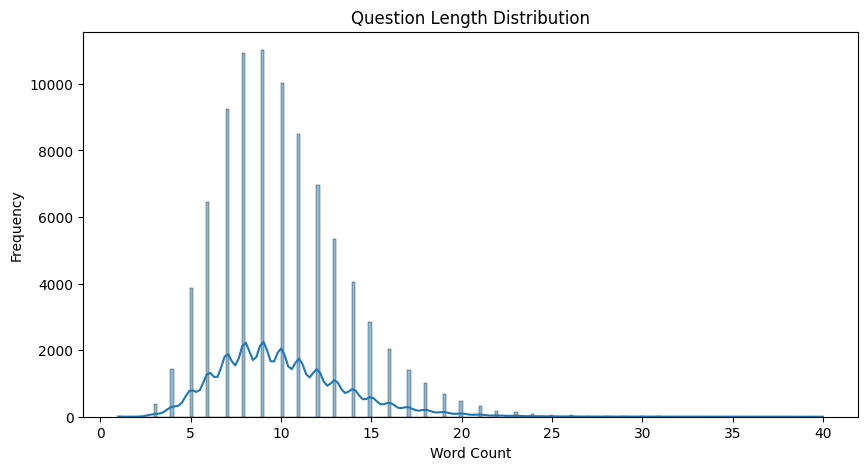

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


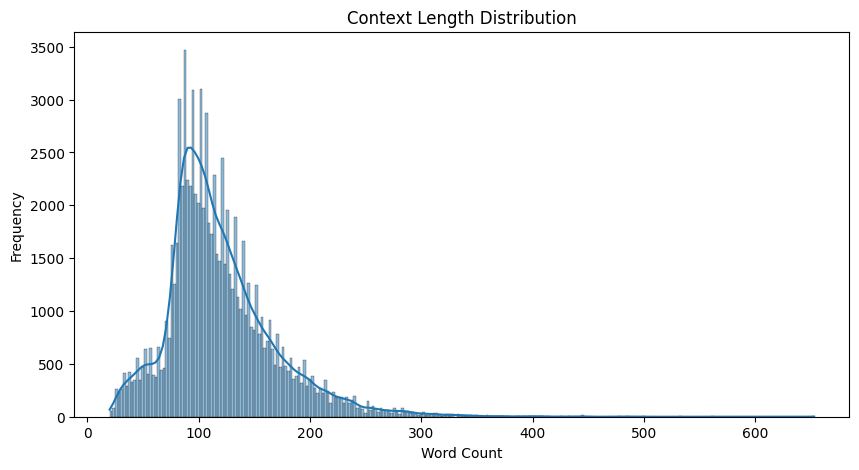

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


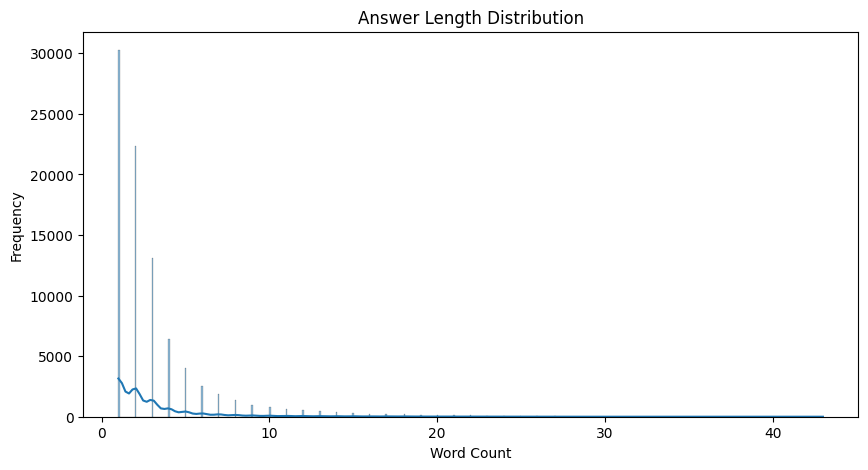

In [12]:
# Question Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["question_length"], kde=True)
plt.title("Question Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Context Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["context_length"], kde=True)
plt.title("Context Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Answer Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["answer_length"], kde=True)
plt.title("Answer Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Top N (20) Frequent words

Get the Top N frequent words in Context, Questions, and Answers Columns and plot their word clouds.

In [13]:
def get_top_n_words(texts, n=20):
    words = " ".join(texts).split()
    return Counter(words).most_common(n)

top_words_contexts = get_top_n_words(df["context_clean"])
top_words_questions = get_top_n_words(df["question_clean"])
top_words_answers = get_top_n_words(df["answer_clean"])

print("\nTop Words in Questions:\n", top_words_questions)
print("\nTop Words in Contexts:\n", top_words_contexts)
print("\nTop Words in Answers:\n", top_words_answers)


Top Words in Questions:
 [('many', 5595), ('year', 3427), ('first', 2821), ('name', 2819), ('type', 2137), ('used', 2131), ('new', 1925), ('city', 1729), ('people', 1619), ('one', 1338), ('two', 1329), ('called', 1327), ('much', 1258), ('use', 1238), ('war', 1123), ('us', 1108), ('time', 1080), ('located', 1038), ('country', 971), ('group', 970)]

Top Words in Contexts:
 [('also', 27360), ('new', 21103), ('first', 20979), ('one', 20848), ('city', 17894), ('many', 15584), ('two', 14106), ('states', 14045), ('used', 13421), ('may', 12908), ('time', 12779), ('state', 12288), ('united', 12152), ('world', 12059), ('century', 11564), ('war', 11448), ('would', 11148), ('years', 10140), ('including', 10045), ('known', 10042)]

Top Words in Answers:
 [('million', 883), ('new', 607), ('century', 601), ('two', 569), ('one', 511), ('united', 504), ('years', 463), ('three', 455), ('war', 425), ('states', 424), ('world', 383), ('state', 357), ('four', 338), ('national', 335), ('john', 334), ('may',

## Visualization of top 20 frequent words

Plot the barplot visualization of the Top 20 Frequent words

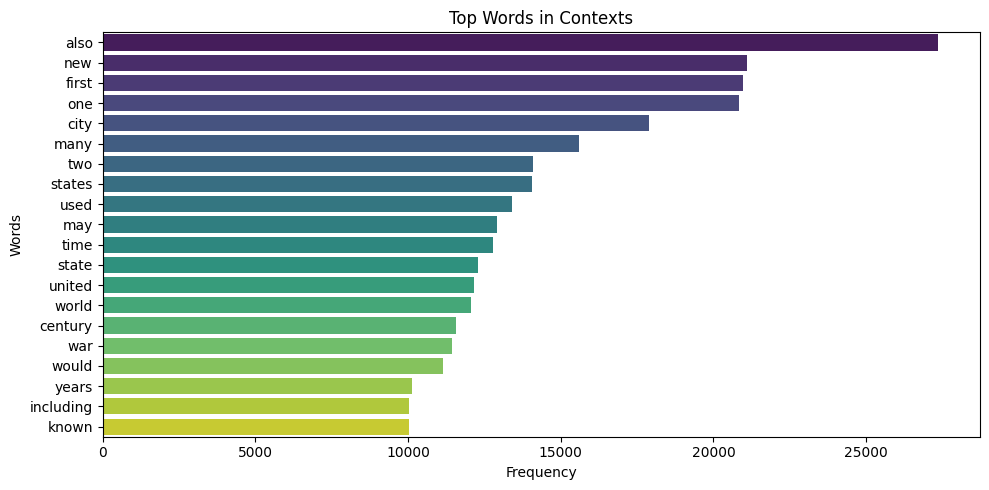

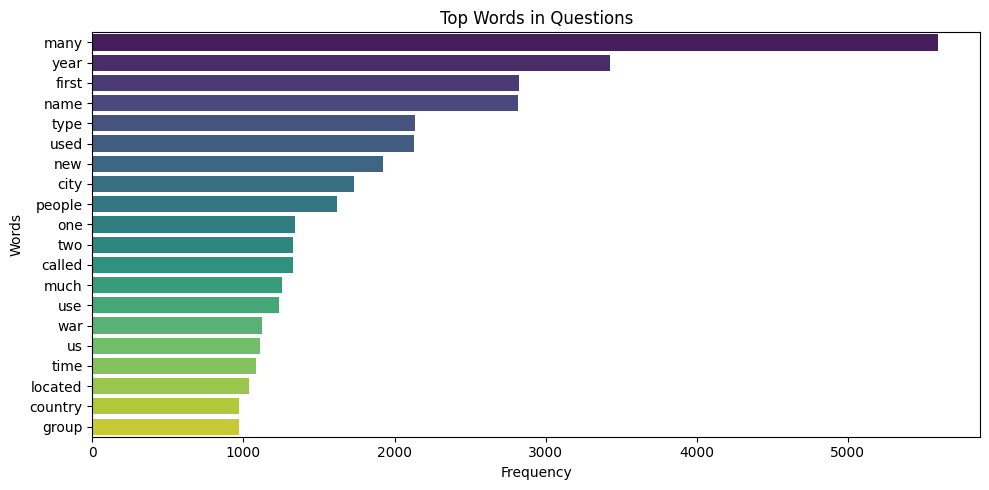

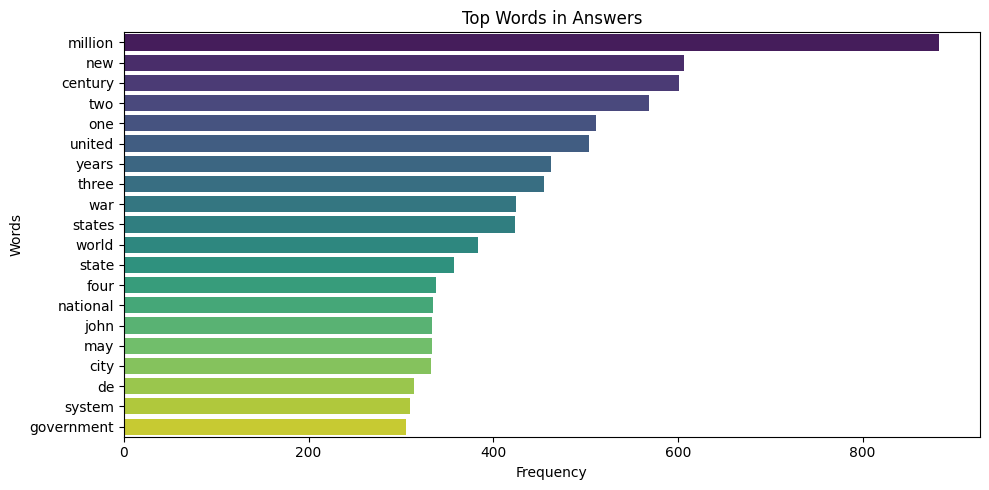

In [15]:
def plot_barplot(words, title):
    if not words:
        print(f"No words to plot for {title}")
        return
    df_plot = pd.DataFrame(words, columns=['word', 'count'])
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='word', data=df_plot, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

plot_barplot(top_words_contexts, "Top Words in Contexts")
plot_barplot(top_words_questions, "Top Words in Questions")
plot_barplot(top_words_answers, "Top Words in Answers")

## Wordcloud Visualization 

This is excluding stopwords

Thoughts:

General: Across all three word clouds, words like "state," "government," "country," "city," "system," "power," and "law" appear frequently.

Context Cloud: The most frequent words are "united," "state," "new," "york," "many," "time," "government," and "war." Heavy presence of geographic and governmental terms suggests that the dataset contains a lot of factual content about U.S. history, governance, and global relations.

Question Cloud: Common words include "many," "year," "name," "first," "type," "state," and "system." The prevalence of "many" and "first" suggests a large portion of the dataset consists of quantitative or ranking-based questions

Answer Cloud: The most frequent words include "one," "two," "three," "million," "state," "national," "power," and "new." The dominance of numerical values ("one," "two," "three," "million") suggests a significant proportion of questions require numeric answers.

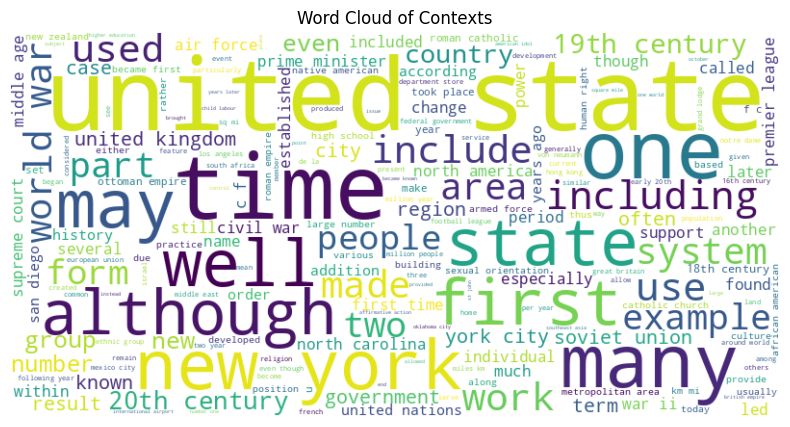

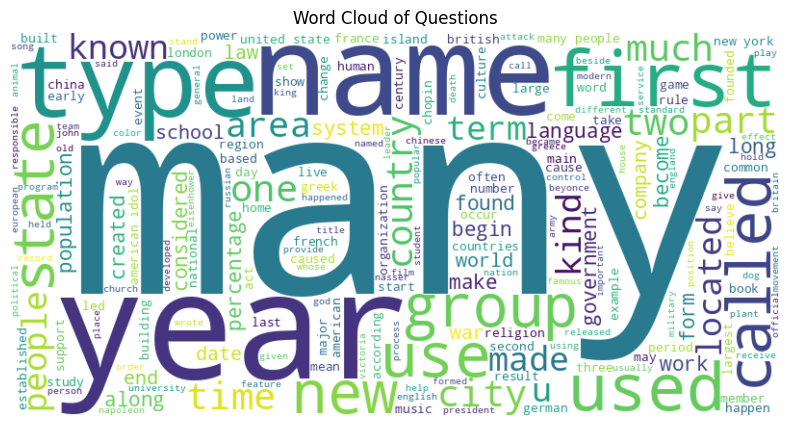

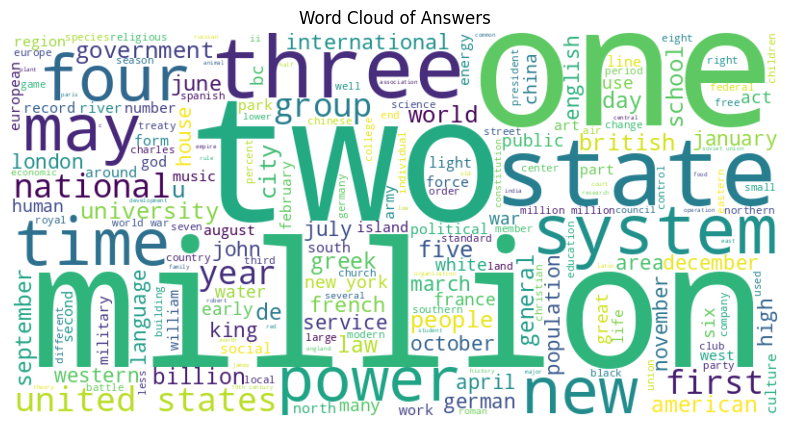

In [14]:
def plot_word_cloud(texts, title):
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_word_cloud(df["context_clean"], "Word Cloud of Contexts")
plot_word_cloud(df["question_clean"], "Word Cloud of Questions")
plot_word_cloud(df["answer_clean"], "Word Cloud of Answers")

## Frequency vs Question types

Identify the different Question types and visualize their frequencies

Thoughts: We check the questions types with the help of regex by searching for text containing who, what, when, where, why, how, which, whom, whose. We then plot their occurences to get an idea what kind of questions are present in the dataset. From barplot we can see that majority of these questions were 'What' questions, suggesting a focus on definitions, explanations and identification answers in the dataset. As compared to 'What' questions the number of "How", "Who", "Which", and "When" Questions are significantly lower. An even lower frequency of 'where' and 'why' questions were observed indicating that the dataset lacks causal explanation and location based answers.

In the context of Context Overloading If the model is trained on this dataset, it might perform exceptionally well on factual recall (what) but struggle with reasoning (why) or location-based retrieval (where). If balance is needed, additional data augmentation or weighting strategies may help reduce bias towards "what" questions.

question_type
what     50461
how       9389
who       8793
which     6082
when      5697
where     3715
other     1585
why       1227
whom       345
whose      302
Name: count, dtype: int64

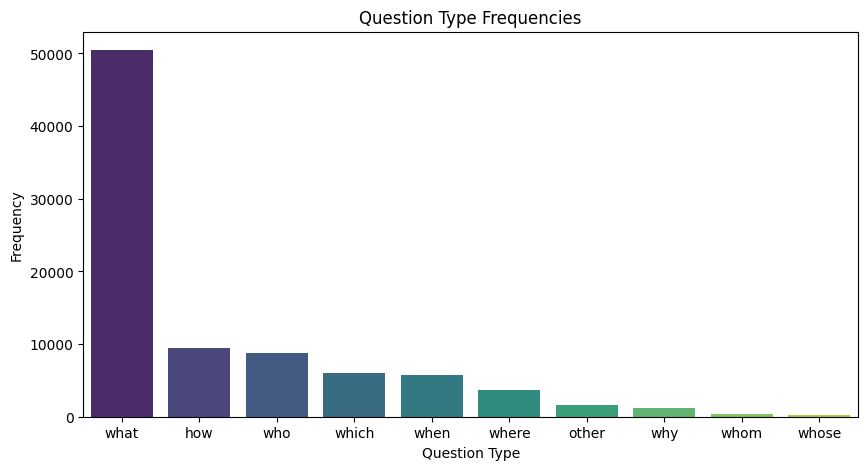

In [16]:
def get_question_type(text):
    # Define a regex pattern to match the question words
    pattern = r'\b(who|what|when|where|why|how|which|whom|whose)\b'
    # Search for a match in the text (case insensitive)
    match = re.search(pattern, text.lower())
    # If a match is found, return the first matched word, else return 'other'
    if match:
        return match.group(0)
    return "other"
df["question_type"] = df["question"].apply(get_question_type)
question_type_counts = df["question_type"].value_counts()
display(question_type_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=question_type_counts.index, y=question_type_counts.values, palette="viridis")
plt.title("Question Type Frequencies")
plt.xlabel("Question Type")
plt.ylabel("Frequency")
plt.show()


## Answer Length vs Question Type

Thoughts: This analysis explores how answer length varies across different question types. The results show that "whom" questions tend to have shorter answers, likely because they ask for specific names, while "whose" questions have the shortest answers overall, as they usually expect a single-word possessive response. Additionally, for "why" questions, the minimum answer length starts at a higher value, suggesting that most answers require at least a few words for meaningful context, while other question types show relatively similar distributions.

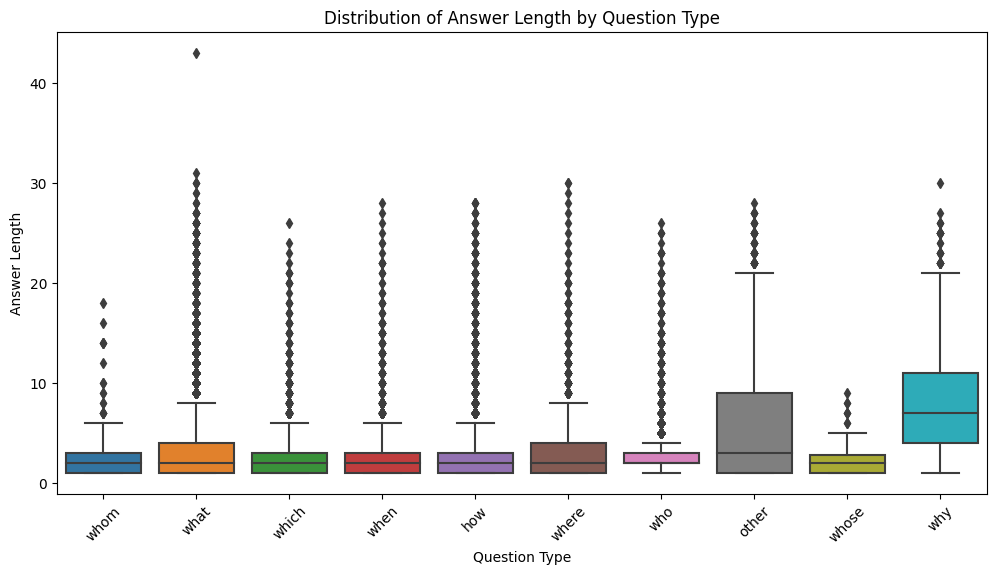

In [19]:
df.head()
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['question_type'], y=df['answer_length'])
plt.xlabel("Question Type")
plt.ylabel("Answer Length")
plt.title("Distribution of Answer Length by Question Type")
plt.xticks(rotation=45)
plt.show()


## Answer start analysis

Thoughts: The graph shows most of the answers can be found at the beginning of the context paragraphs, this kind of implies that like LLMs, humans also have a bias towards certain areas of the context to focus on and generate questions from. 
It also gives us an insight towards our implementation of context overloading. when we will be making chunks of the context to give it to smaller LLMs, it will be ideal if we chunk while separating by paragraph starting or endings.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


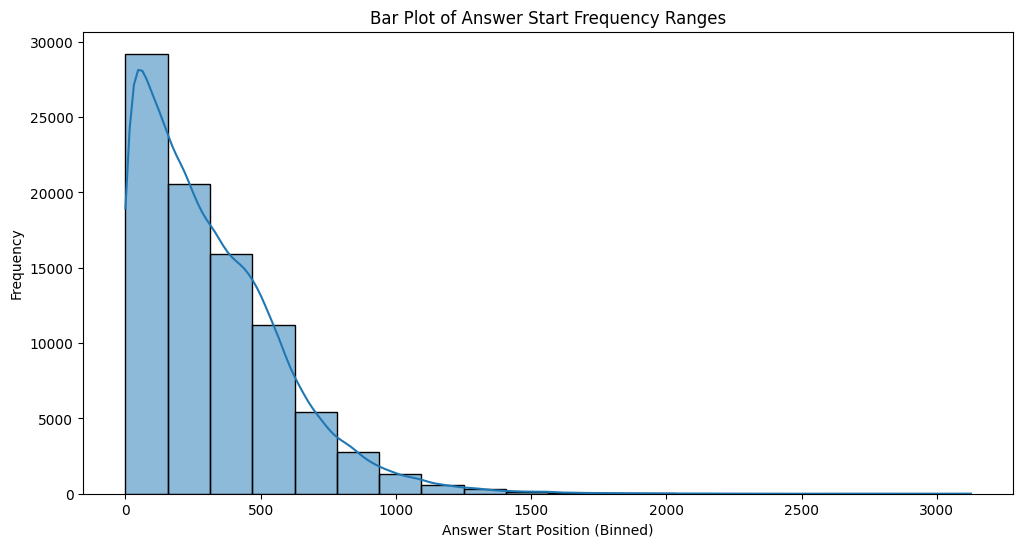

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['answer_start'], bins=20, kde=True)
plt.xlabel("Answer Start Position (Binned)")
plt.ylabel("Frequency")
plt.title("Bar Plot of Answer Start Frequency Ranges")
plt.show()

## Answer Overlap with Context

Thoughts: This analysis measures how much the answer text overlaps with the context using Jaccard similarity, helping to understand if answers tend to be direct extracts or paraphrased interpretations. 
The exponentially decreasing curve shows that most answers have low overlap with their context, meaning they are often paraphrased or only partially extracted. Fully copied answers are much less common, indicating that the dataset likely encourages comprehension-based responses rather than direct retrieval.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


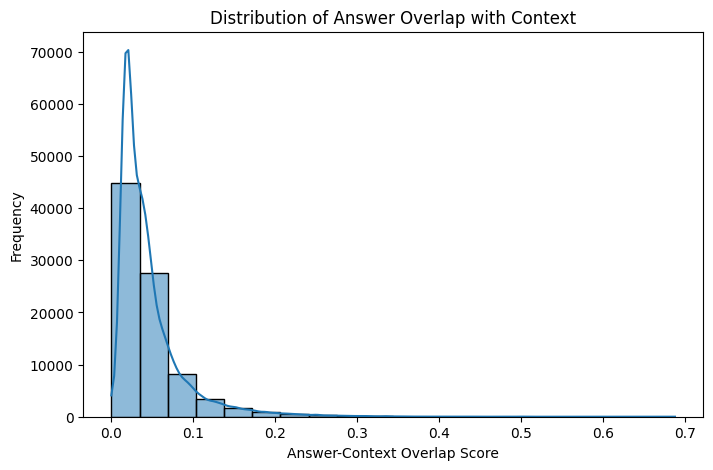

In [18]:
def jaccard_similarity(str1, str2):
    words1 = set(str1.split())
    words2 = set(str2.split())
    return len(words1 & words2) / len(words1 | words2) if len(words1 | words2) > 0 else 0

df['answer_context_overlap'] = df.apply(lambda row: jaccard_similarity(row['answer_clean'], row['context_clean']), axis=1)

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['answer_context_overlap'], bins=20, kde=True)
plt.xlabel("Answer-Context Overlap Score")
plt.ylabel("Frequency")
plt.title("Distribution of Answer Overlap with Context")
plt.show()


## Context length vs Question length

Thoughts: This test examines whether context length and question length are correlated, determining if longer passages lead to longer questions.
With a correlation of 0.0161, there is almost no relationship, meaning question length remains fairly independent of passage length. This suggests that questions are likely formulated based on key information rather than the overall passage size.

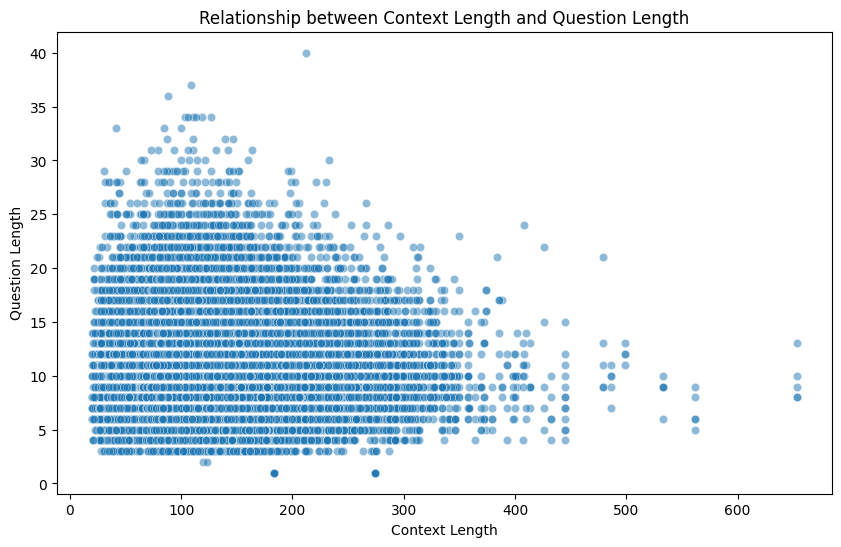

Correlation between Context Length and Question Length:
                  context_length  question_length
context_length         1.000000         0.016081
question_length        0.016081         1.000000


In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['context_length'], y=df['question_length'], alpha=0.5)
plt.xlabel("Context Length")
plt.ylabel("Question Length")
plt.title("Relationship between Context Length and Question Length")
plt.show()

# Compute correlation
correlation = df[['context_length', 'question_length']].corr()
print("Correlation between Context Length and Question Length:\n", correlation)


## Context Length vs  Answer start

Thoughts: By computing the correlation coefficient, we aimed to determine if longer contexts tend to push answers further into the passage or if answer positions are more randomly distributed.
The correlation coefficient of 0.4129 indicates a moderate positive relationship between context length and answer start position, meaning longer contexts tend to have answers appearing later but not in a strictly linear fashion. This suggests that while longer passages increase the likelihood of later answers, other factors such as passage structure and question type also play a role

Correlation coefficient between context length and answer start position: 0.4129


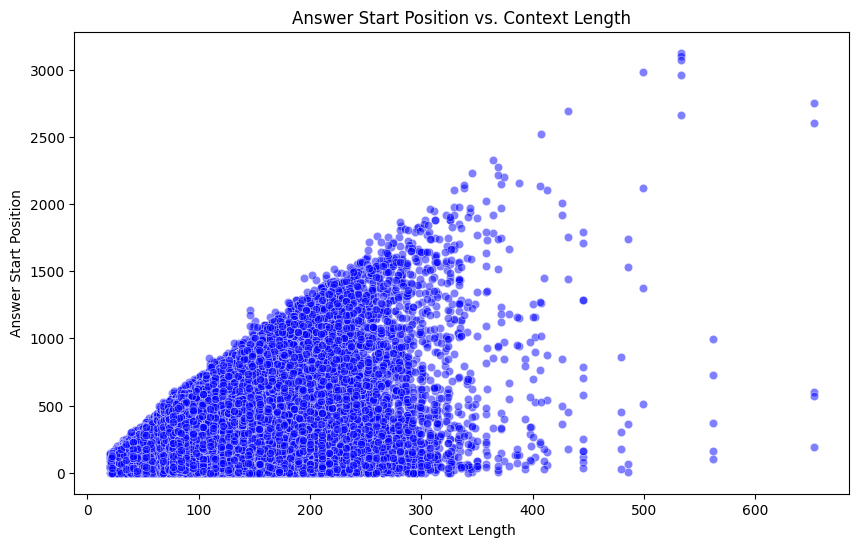

In [22]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot of answer_start vs. context_length
sns.scatterplot(x=df['context_length'], y=df['answer_start'], alpha=0.5, color='blue')

# Labels and Title
plt.xlabel("Context Length")
plt.ylabel("Answer Start Position")
plt.title("Answer Start Position vs. Context Length")

correlation = np.corrcoef(df['context_length'], df['answer_start'])[0, 1]
print(f"Correlation coefficient between context length and answer start position: {correlation:.4f}")

# Show the plot
# Show the plot
plt.show()
